In [ ]:
### Name: Harsh Harsh ####
### Date: 01/11/2022 ####
### Detail: This code was created as part of company's technical interview round to do EDA on a dataset ###

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt
from matplotlib import pyplot
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import streamlit as st
from bokeh.plotting import figure
import altair as alt
from scipy import stats
from datetime import datetime

from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
import statsmodels.api as sm
from sklearn.datasets import make_blobs
import missingno as mi

In [3]:

## Reading the data file

data = pd.read_csv('Copy of Case Study - Case Study.csv')

In [ ]:
### checking the data ###

data.head()

In [ ]:
## checking the column names ##

data.columns

In [81]:
## checking all the system columns and cross-checking the systems count column ##

a = list(range(6, 18))

partial = data.iloc[:,a]
data['system_sum'] = list(partial.apply(np.sum, axis=1))
data['system_diff'] = data['system_sum'] - data['systemcount']

In [82]:
### checking if any is true ###
### in this case it would mean that the number of systems match with the systems attached ###

any(list(data['system_diff'] > 0))

False

In [4]:
## check all the cases where the decision rate is greater than zero ##

partial = data[data['decisionrate'] > 0]
a = list(range(1, 17))
partial.iloc[:,a]

2022-01-11 18:00:57.763 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [5]:
##looking at the data in descending order ###

data.sort_values(['systemcount'], ascending = False)

,ID Number,type,decisionrate,systemcount,stackcount,agents,system-custom,system-entitlements,system-envoy,system-istio,...,stack-entitlements,stack-envoy,stack-istio,stack-kafka,stack-kong-gateway,stack-kong-mesh,stack-kubernetes,stack-kuma,stack-pam,stack-terraform
122,123,Test 1,0.00000,4,2,0,1,0,0,0,...,0,0,0,0,0,0,2,0,0,0
1220,1221,Test 1,0.00000,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1349,1350,Test 1,0.00000,4,1,0,0,0,1,2,...,0,0,1,0,0,0,0,0,0,0
961,962,Test 1,0.61017,4,0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1263,1264,Test 1,0.00000,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,893,Test 1,0.00000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
893,894,Test 1,0.00000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
895,896,Test 1,0.00000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
896,897,Test 1,0.00000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
### exploring the data from agents and sytems count ##

partial = data.sort_values(['agents'], ascending = False)
partial.head(10)


### there are three ids whhere the number of agents are higher than 10 and still no decision is being made. ##

partial = data.sort_values(['systemcount'], ascending = False)
partial = partial.head(10)
partial.iloc[:,1:17]

,type,decisionrate,systemcount,stackcount,agents,system-custom,system-entitlements,system-envoy,system-istio,system-kafka,system-kong-gateway,system-kong-mesh,system-kubernetes,system-kuma,system-pam,system-terraform
122,Test 1,0.000000,4,2,0,1,0,0,0,0,0,0,3,0,0,0
1220,Test 1,0.000000,4,0,0,0,0,0,0,0,0,0,4,0,0,0
1349,Test 1,0.000000,4,1,0,0,0,1,2,0,0,0,1,0,0,0
961,Test 1,0.610170,4,0,3,1,0,0,0,0,0,0,3,0,0,0
1263,Test 1,0.000000,4,1,0,0,0,0,0,0,0,1,2,0,0,1
1061,Test 1,0.000000,4,0,0,0,0,0,0,0,0,0,4,0,0,0
1308,Test 1,0.000000,4,0,0,0,0,1,0,0,0,1,1,1,0,0
424,Test 1,71.216666,4,0,4,1,0,1,1,0,0,0,1,0,0,0
138,Test 1,0.000000,3,0,0,3,0,0,0,0,0,0,0,0,0,0
839,Test 1,0.000000,3,1,0,3,0,0,0,0,0,0,0,0,0,0


[Text(0, 0, 'custom'),
 Text(1, 0, 'entitlements'),
 Text(2, 0, 'envoy'),
 Text(3, 0, 'istio'),
 Text(4, 0, 'kafka'),
 Text(5, 0, 'kong-gateway'),
 Text(6, 0, 'kong-mesh'),
 Text(7, 0, 'kubernetes'),
 Text(8, 0, 'kuma'),
 Text(9, 0, 'pam'),
 Text(10, 0, 'terraform')]

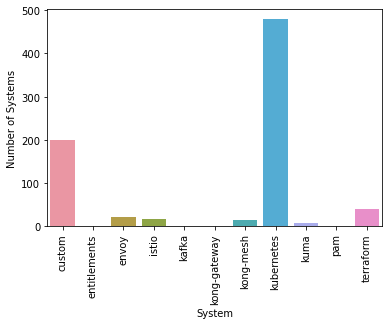

In [116]:
## trying to plot the type of systems ####

a = list(range(6, 17))
a.append(2)
partial = data.iloc[:,a]
partial = pd.melt(partial, id_vars="decisionrate", var_name="System", value_name="count")
df1 = partial.groupby('System').agg({'count':'sum'}).reset_index()
df1 = df1.rename(columns = {'count':'Number of Systems'})


### removing the word system ### 

df1['System'] = list(map(lambda x: list(x.split("system-"))[1], list(df1['System'])))

ax = sns.barplot(x="System", y="Number of Systems", data=df1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [49]:
## creating a new column whether the decision rate was greatre than or less than zero ##

data['decisionrate_status'] = list(map(lambda x: "Yes" if x > 0 else "No", list(data['decisionrate'])))

/Users/rctrj/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


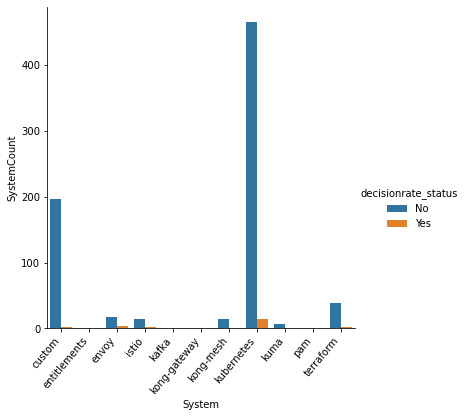

In [117]:
## plotting the systems wrt decision rate yes or no ##

a = list(range(6, 17))
a.append(30)

partial = data.iloc[:, a]
partial = pd.melt(partial, id_vars="decisionrate_status", var_name="System", value_name="SystemCount")
partial = partial.groupby(['decisionrate_status', 'System']).agg({'SystemCount':'sum'}).reset_index()


partial['System'] = list(map(lambda x: list(x.split("system-"))[1], list(partial['System'])))

ax = sns.factorplot(x='System', y='SystemCount', hue='decisionrate_status', data=partial, kind='bar')
ax.set_xticklabels(rotation=50, horizontalalignment='right')

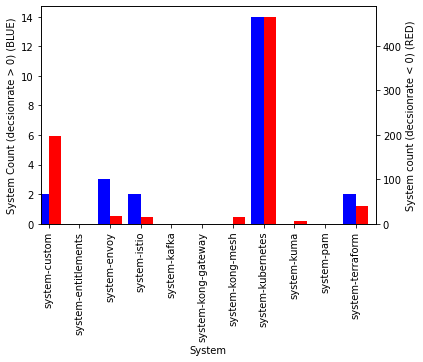

In [93]:
#### plotting the data ####

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

dd = partial[partial['decisionrate_status'] == "Yes"]
dd.SystemCount.plot(kind='bar', color='blue', ax=ax, width=width, position=1)

dd = partial[partial['decisionrate_status'] == "No"]
dd.SystemCount.plot(kind='bar', color='red', ax=ax2, width=width, position=0)

ax.set_ylabel('System Count (decsionrate > 0) (BLUE)')
ax2.set_ylabel('System count (decsionrate < 0) (RED)')
ax.set_xlabel('System')

labels = list(dd['System'])
ax.set_xticklabels(labels)


plt.show()

In [78]:
partial

,decisionrate_status,System,SystemCount
0,No,system-custom,197
1,No,system-entitlements,0
2,No,system-envoy,18
3,No,system-istio,15
4,No,system-kafka,0
5,No,system-kong-gateway,0
6,No,system-kong-mesh,15
7,No,system-kubernetes,465
8,No,system-kuma,7
9,No,system-pam,0


In [120]:
dd = partial[partial['decisionrate_status'] == "No"]
dd = dd.iloc[:,1:3]

dd1 = partial[partial['decisionrate_status'] == "Yes"]
dd1 = dd1.iloc[:,1:3]

df = pd.merge(dd, dd1, how = "inner", on = "System")
df = df.rename(columns={'SystemCount_x':'No Decision Made', 'SystemCount_y':'Decision Made'})
df['percentage system involved in decision making'] = (df['Decision Made'] / (df['No Decision Made'] + 1))*100

df['System'] = list(map(lambda x: list(x.split("system-"))[0], list(df['System'])))

df

,System,No Decision Made,Decision Made,percentage system involved in decision making
0,custom,197,2,1.010101
1,entitlements,0,0,0.000000
2,envoy,18,3,15.789474
3,istio,15,2,12.500000
4,kafka,0,0,0.000000
5,kong-gateway,0,0,0.000000
6,kong-mesh,15,0,0.000000
7,kubernetes,465,14,3.004292
8,kuma,7,0,0.000000
9,pam,0,0,0.000000


In [73]:
#### checking data again ####

data[data['decisionrate']>0]


### the decision rate is too low even after presence of 4 system and 3 agents for ID Number 962 ####
### the decision rate is too high for ID Number 1006 for just one system ####

,ID Number,type,decisionrate,systemcount,stackcount,agents,system-custom,system-entitlements,system-envoy,system-istio,...,stack-kafka,stack-kong-gateway,stack-kong-mesh,stack-kubernetes,stack-kuma,stack-pam,stack-terraform,system_sum,system_diff,decisionrate_status
171,172,Test 1,112.633330,1,0,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Yes
257,258,Test 1,925.135600,1,0,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Yes
361,362,Test 1,248.016950,1,0,9,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Yes
424,425,Test 1,71.216666,4,0,4,1,0,1,1,...,0,0,0,0,0,0,0,4,0,Yes
961,962,Test 1,0.610170,4,0,3,1,0,0,0,...,0,0,0,0,0,0,0,4,0,Yes
1005,1006,Test 1,2628.200000,1,0,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Yes
1151,1152,Test 1,588.000000,1,1,3,0,0,0,0,...,0,0,0,1,0,0,0,1,0,Yes
1211,1212,Test 1,182.796620,2,0,3,0,0,0,0,...,0,0,0,0,0,0,0,2,0,Yes
1334,1335,Test 1,51.683334,2,0,3,0,0,0,0,...,0,0,0,0,0,0,0,2,0,Yes
1425,1426,Test 1,37.355930,3,0,2,0,0,2,1,...,0,0,0,0,0,0,0,3,0,Yes
